# Analyzing Light Curves with Lightkurve
***
## Learning Goals
This notebook will cover the basics of getting lightcurve data from MAST. We'll use the popular lightkurve package for our analysis.

In this notebook, you'll learn:
- How to get the cloud locations of files
- How to use lightkuve to calculate meaningful properties of astrophysical targets

## Imports

This notebook is light on imports. However, we will need to do two somewhat unusual things:
1. enable searching in the cloud, so that we can open cloud files directly in memory
2. enable matplotlib inline so that you don't need to call `plt.show()` to use lightkurve plotting features

In [1]:
from astroquery.mast import Observations
import lightkurve as lk

# we need this to get cloud file locations
Observations.enable_cloud_dataset()

# if we don't do this, lightkurve behaves weirdly  
%matplotlib inline

INFO: Using the S3 STScI public dataset [astroquery.mast.cloud]


## Querying for Cloud Data


Note that this workflow is taught in more detail in the astroquery notebook. It would be easier to complete that challenge first, then attempt this one!

For our example target, we'll use Kepler observations of `HAT-P-11`, a star known to host a Hot Jupiter planet. Fill in the corresponding values for objectname and obs_collection:

In [21]:
obs = Observations.query_criteria(objectname="",
                                  radius='2s',
                                  obs_collection="")

# we are displaying selected columns, since the
# full table is rather wide
#obs
obs['target_name', 'intentType', 'filters', 'dataproduct_type']

target_name,intentType,filters,dataproduct_type
str13,str7,str6,str10
kplr010748390,science,KEPLER,timeseries
kplr010748390,science,KEPLER,timeseries


You should see two matching observations. Now we need to turn these into products, as before. We will also filter to get just the light curves: just add `llc` to subgroup description.

In [22]:
prod = Observations.get_product_list(obs[0])
filt = Observations.filter_products(prod,
                                    productSubGroupDescription = "")

Almost there. The last step is to call the `get_cloud_uris` function, passing in our filtered products.

In [24]:
curi = Observations.get_

## Using Lightkurve

Lightkurve was designed to be used with data from the Kepler and TESS missions. It has many features that accelerate data analysis and discovery. The [lightkurve docs](https://lightkurve.github.io/lightkurve/) are full of helpful examples, so they're often a good place to start.

The package maintainers have specifically enabled a feature that reads data from the cloud into memory; this substantially improves performance on TIKE. We'll read in some data below:

In [25]:
kepler_lc = lk.read(curi[0])

And that's it! Our data has been read into memory and we can now use some of the lightkurve tools. 

Creating a plot is straightforward: just call `.plot()` on the light curve we read in above!

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

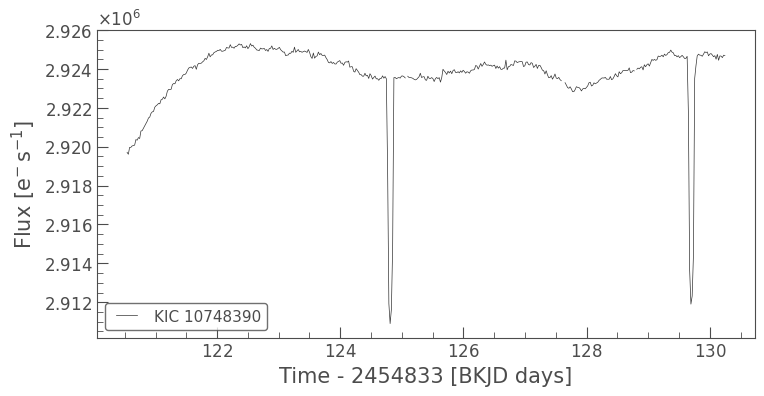

In [27]:
kepler_lc

Another handy feature is the ability to generate a periodogram. This is done through the `.to_periodogram` command.

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

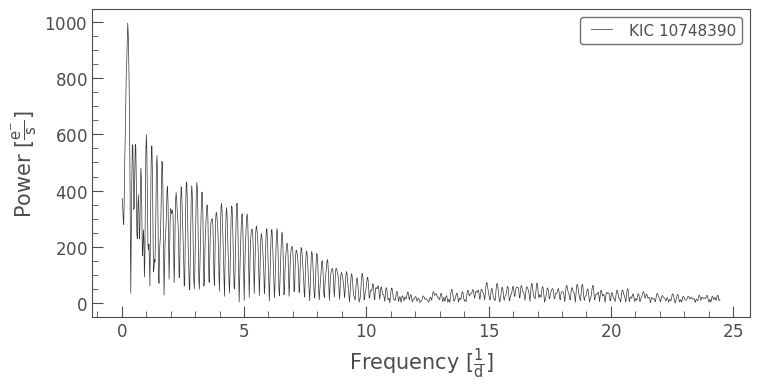

In [28]:
kepler_lc.to_periodogram().plot()

## Solving the Puzzle

To get your next clue, perform a search on the variable star `EPIC 236286847`.  Calculate its period in hours, then subtract one. If you convert this to a letter, you'll have your next clue!

## About this Notebook
This notebook was written for the "Defeating Dr. Nefarious" data challenge workshop. 

**Author:** Thomas Dutkiewicz <br>
**Keywords:** Timeseries, kepler, variable stars<br>

***
[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/style-guides/master/guides/images/stsci-logo.png" alt="Space Telescope Logo" width="200px"/> 